<a href="https://colab.research.google.com/github/Kishorup/k-means-clustering/blob/main/Generalized%20K%20means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def initialize_centroids(data, k):
    np.random.seed(42)
    return data[np.random.choice(len(data), k, replace=False)]

def assign_clusters(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, assignments, centroids, k):
    return np.array([
        data[assignments == i].mean(axis=0) if np.any(assignments == i) else centroids[i]
        for i in range(k)
    ])

def compute_wcss(data, centroids, assignments):
    return sum(np.sum((data[assignments == i] - centroids[i]) ** 2) for i in range(len(centroids)))

def visualize_clusters(data, centroids, assignments):
    colors = ['red', 'green', 'blue', 'orange', 'purple']
    for i in range(len(centroids)):
        cluster_data = data[assignments == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1],
                    c=colors[i % len(colors)], label=f'Cluster {i}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('k-Means Clustering (Projected on 2 Features)')
    plt.legend()
    plt.grid(True)
    plt.show()


In [3]:
# Sample data: 12 samples, 4 features
data = np.array([
    [1.0, 1.5, 0.8, 1.2],
    [1.2, 1.7, 0.9, 1.1],
    [1.1, 1.4, 0.7, 1.3],
    [1.3, 1.6, 0.85, 1.15],
    [4.0, 4.5, 3.8, 4.2],
    [4.2, 4.7, 3.9, 4.1],
    [4.1, 4.4, 3.7, 4.3],
    [4.3, 4.6, 3.85, 4.15],
    [2.0, 2.2, 1.8, 2.1],
    [2.1, 2.3, 1.9, 2.0],
    [4.5, 4.8, 4.0, 4.4],
    [4.4, 4.9, 3.95, 4.35]
])


In [4]:
k = 3
max_iters = 100

centroids = initialize_centroids(data, k)

for i in range(max_iters):
    assignments = assign_clusters(data, centroids)
    new_centroids = update_centroids(data, assignments, centroids, k)

    if np.allclose(centroids, new_centroids):
        print(f"✅ Converged at iteration {i+1}")
        break

    centroids = new_centroids


✅ Converged at iteration 2


In [5]:
print("🔸 Final Cluster Assignments:")
for idx, cluster in enumerate(assignments):
    print(f"Sample {idx}: Cluster {cluster}")

print("\n🔸 Final Centroids:")
print(centroids)

wcss = compute_wcss(data, centroids, assignments)
print(f"\n🔸 WCSS (Within-Cluster Sum of Squares): {wcss:.4f}")


🔸 Final Cluster Assignments:
Sample 0: Cluster 2
Sample 1: Cluster 2
Sample 2: Cluster 2
Sample 3: Cluster 2
Sample 4: Cluster 0
Sample 5: Cluster 0
Sample 6: Cluster 0
Sample 7: Cluster 0
Sample 8: Cluster 1
Sample 9: Cluster 1
Sample 10: Cluster 0
Sample 11: Cluster 0

🔸 Final Centroids:
[[4.25       4.65       3.86666667 4.25      ]
 [2.05       2.25       1.85       2.05      ]
 [1.15       1.55       0.8125     1.1875    ]]

🔸 WCSS (Within-Cluster Sum of Squares): 0.6421


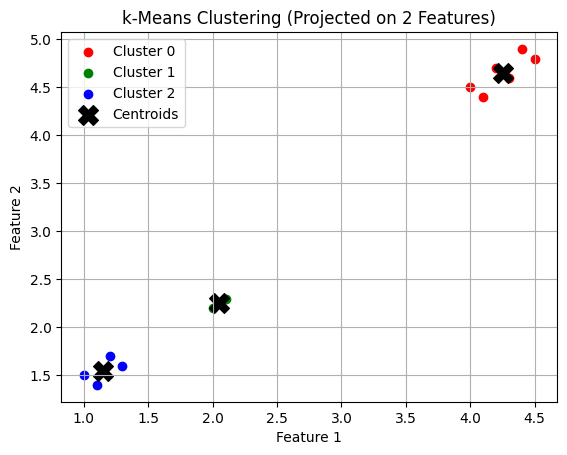

In [6]:
visualize_clusters(data, centroids, assignments)
